In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from matplotlib.dates import DateFormatter, AutoDateLocator
import unicodedata


In [18]:
soireInte = pd.read_csv("inte.csv", sep=";")

files = [file for file in listdir() if file.endswith("csv")]
soirees = [pd.read_csv(file, sep=";") for file in files]
print(files)

['post-partiel.csv', 'wei-2.3a.csv', 'gala-hiver.csv', 'wei-1a.csv', 'reinte.csv', 'octobre-rose.csv', 'parrain-marraines.csv', 'famous.csv', 'inte.csv']


In [19]:
for soiree in soirees:
    soiree["Date de la commande"] = pd.to_datetime(soiree["Date de la commande"])
    soiree["Date de la commande"] = soiree["Date de la commande"].dt.date

/tmp/ipykernel_3744/1856323528.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  soiree["Date de la commande"] = pd.to_datetime(soiree["Date de la commande"])
/tmp/ipykernel_3744/1856323528.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  soiree["Date de la commande"] = pd.to_datetime(soiree["Date de la commande"])
/tmp/ipykernel_3744/1856323528.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  soiree["Date de la commande"] = pd.to_datetime(soiree["Date de la commande"])
/tmp/ipykernel_3744/1856323528.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayf

In [100]:
counts = [pd.DataFrame() for _ in range(len(soiree))]
a = 0
for soiree, count in zip(soirees, counts):
    count["Date"]                                      = soiree["Date de la commande"].drop_duplicates()
    count["Jours avant event"]                         = [str(n) for n in range(len(count))]
    count["Avancement temps"]                          = [100 * n                                     / (len(count) - 1)                for n in range(len(count))]    
    count["Inscrits ce jour"]                          = soiree.groupby("Date de la commande").size().reindex(count["Date"], fill_value=0).values
    count["Total inscrits"]                            = count["Inscrits ce jour"].cumsum()
    count["Proportion inscrits"]                       =  100 * count["Total inscrits"]               / count["Inscrits ce jour"].sum()
    count["Adherents inscrits ce jour"]                = soiree[soiree["Tarif"].str.contains(" adhérent")].groupby("Date de la commande").size().reindex(count["Date"], fill_value=0).values
    count["Total adherents inscrits"]                  = count["Adherents inscrits ce jour"].cumsum()    
    count["Proportion adherents inscrits"]             =  100 * count["Total adherents inscrits"]     / count["Inscrits ce jour"].sum()
    count["Non-adherents inscrits ce jour"]            = soiree[soiree["Tarif"].str.contains("non-adhérent")].groupby("Date de la commande").size().reindex(soiree["Date de la commande"].drop_duplicates(), fill_value=0).values
    count["Total non-adherents inscrits"]              = count["Non-adherents inscrits ce jour"].cumsum()    
    count["Proportion non-adherents inscrits"]         =  100 * count["Total non-adherents inscrits"] / count["Inscrits ce jour"].sum()
    count["Boursiers inscrits ce jour"]                = soiree[soiree["Tarif"].str.contains("boursier")].groupby("Date de la commande").size().reindex(soiree["Date de la commande"].drop_duplicates(), fill_value=0).values
    count["Total boursiers inscrits"]                  = count["Boursiers inscrits ce jour"].cumsum()    
    count["Proportion boursiers inscrits"]             =  100 * count["Total boursiers inscrits"] / count["Inscrits ce jour"].sum()


In [101]:
counts[0][["Avancement temps", "Proportion inscrits", "Total inscrits"]]

,Avancement temps,Proportion inscrits,Total inscrits
0,0.0,26.5,53
53,10.0,34.0,68
68,20.0,44.5,89
89,30.0,46.0,92
92,40.0,49.5,99
99,50.0,54.0,108
108,60.0,56.0,112
112,70.0,57.0,114
114,80.0,60.0,120
120,90.0,74.0,148


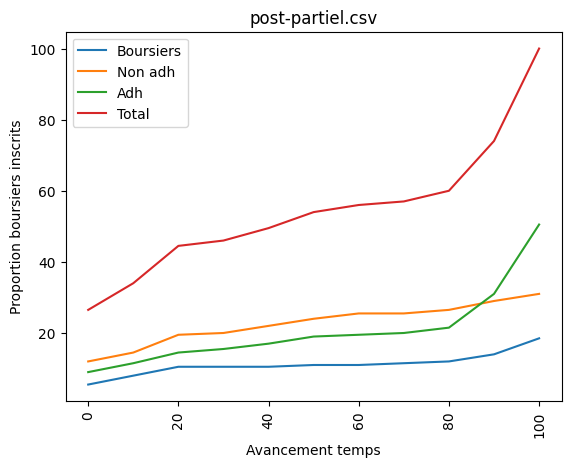

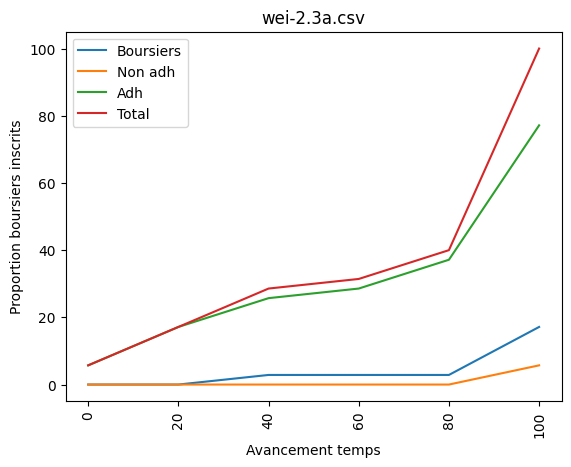

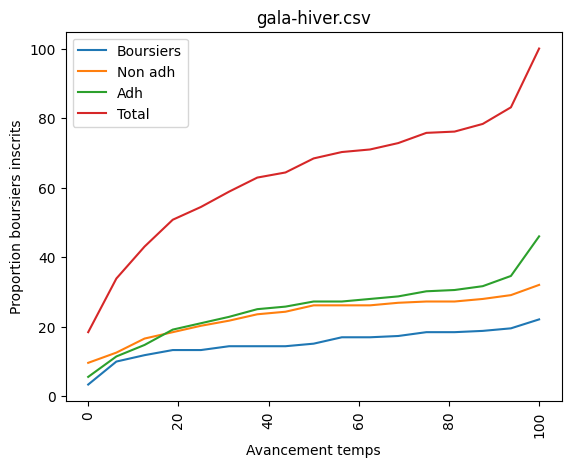

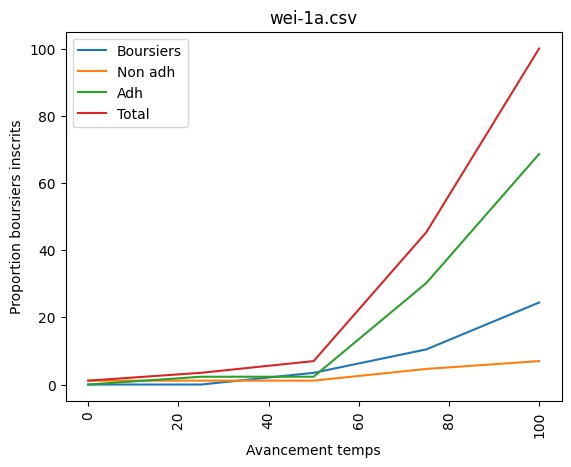

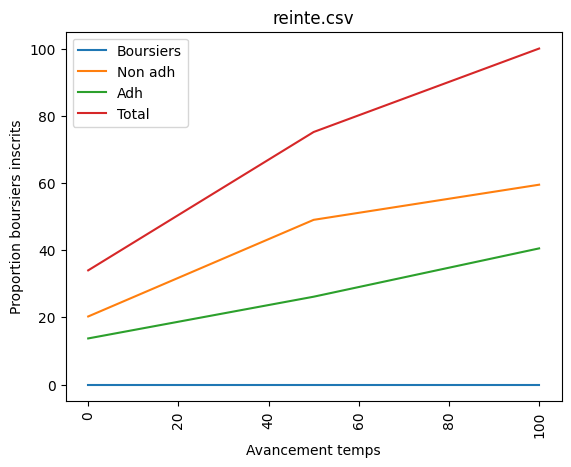

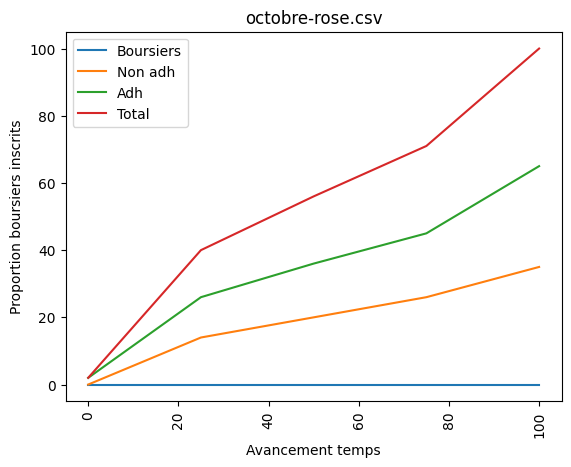

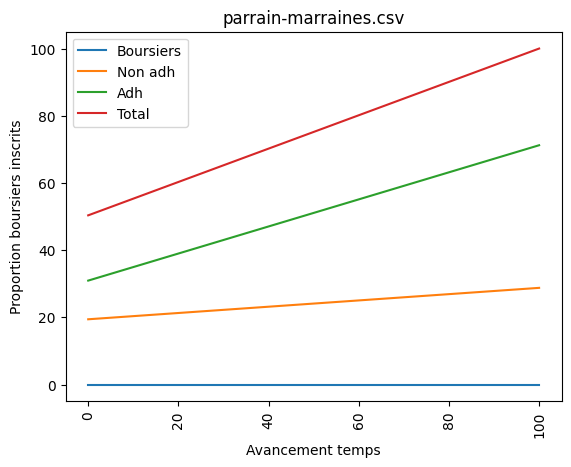

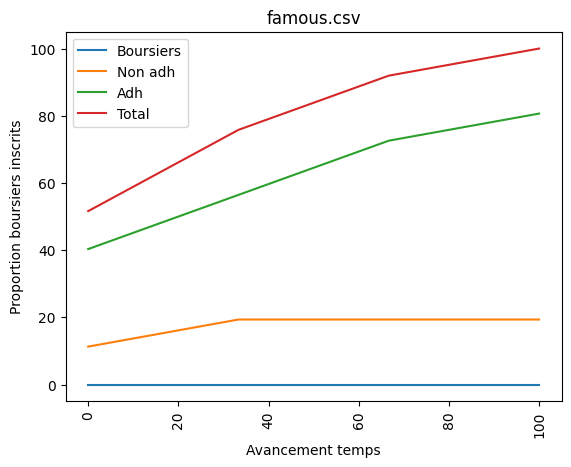

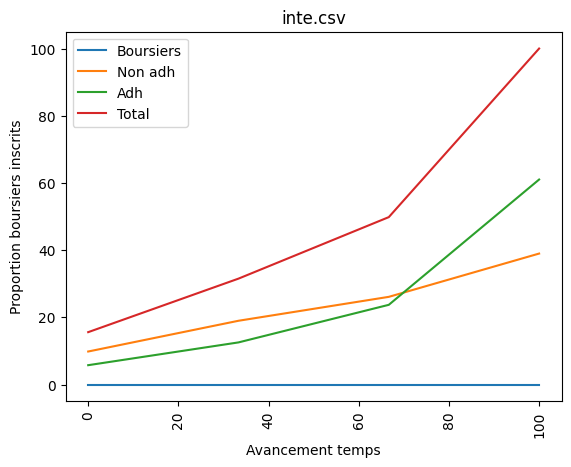

In [102]:
for i in range(len(files)):
    # sns.lineplot(data=counts[i], x="Date", y="Inscrits ce jour", label="Total")
    # sns.lineplot(data=counts[i], x="Date", y="Non-adherents inscrits ce jour", label="Non adherents")
    # sns.lineplot(data=counts[i], x="Date", y="Adherents inscrits ce jour", label="Adherents")
    # sns.lineplot(data=counts[i], x="Date", y="Boursiers inscrits ce jour", label="Boursiers")
    for j, k in zip(["Proportion boursiers inscrits", "Proportion non-adherents inscrits", "Proportion adherents inscrits", "Proportion inscrits"], ["Boursiers", "Non adh", "Adh", "Total"]):
        sns.lineplot(data=counts[i], x="Avancement temps", y=j, label=k)

    plt.title(files[i])

    # plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    # plt.gca().xaxis.set_major_locator(AutoDateLocator())

    plt.xticks(rotation=90)
    plt.legend()
    plt.show()


In [103]:
counts[1].head(1)[["Date", "Total inscrits", "Total adherents inscrits", "Total non-adherents inscrits", "Total boursiers inscrits"]]

,Date,Total inscrits,Total adherents inscrits,Total non-adherents inscrits,Total boursiers inscrits
0,2023-09-20,2,2,0,0


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'parrain-marraines.csv'),
  Text(1, 0, 'inte.csv'),
  Text(2, 0, 'famous.csv'),
  Text(3, 0, 'wei-1a.csv'),
  Text(4, 0, 'wei-2.3a.csv'),
  Text(5, 0, 'octobre-rose.csv'),
  Text(6, 0, 'reinte.csv'),
  Text(7, 0, 'post-partiel.csv'),
  Text(8, 0, 'gala-hiver.csv')])

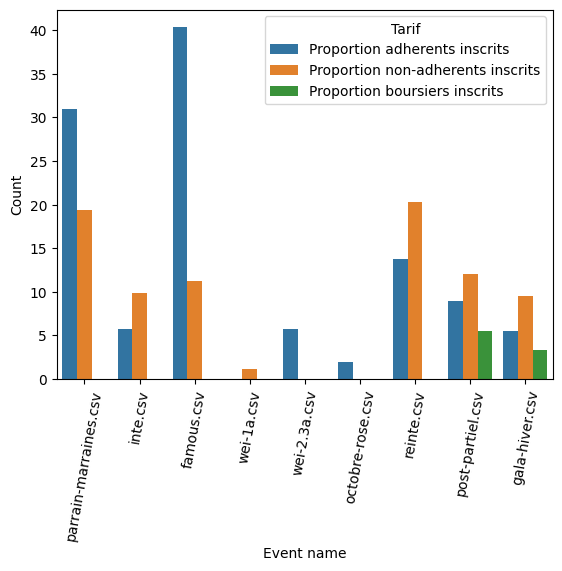

In [104]:
totals = []
for i in range(len(files)):
    totals += [counts[i].head(1)[["Date", "Proportion adherents inscrits", "Proportion non-adherents inscrits", "Proportion boursiers inscrits"]]]

totals = pd.concat(totals)
totals["Event name"] = files
totals = totals.sort_values(by='Date').drop("Date", axis=1)
melted = totals.melt(id_vars="Event name", var_name="Tarif", value_name="Count")
sns.barplot(data=melted, x="Event name", y="Count", hue="Tarif")
plt.xticks(rotation=80)

In [105]:
boursiers = [soiree[["Nom participant", "Prénom participant"]][soiree["Tarif"].str.contains("boursier")] for soiree in soirees]
boursiers = [boursier for boursier in boursiers if not boursier.empty]
boursiers = pd.concat(boursiers)
boursiers = boursiers.applymap(lambda val: unicodedata.normalize('NFKD', val).encode('ASCII', 'ignore').decode('utf-8').lower().strip())
boursiers_count = boursiers.groupby(["Nom participant", "Prénom participant"]).size()

In [106]:
adhs = [soiree[["Nom participant", "Prénom participant"]][soiree["Tarif"].str.contains("adhérent")] for soiree in soirees]
adhs = [adh for adh in adhs if not adh.empty]
adhs = pd.concat(adhs)
adhs = adhs.applymap(lambda val: unicodedata.normalize('NFKD', val).encode('ASCII', 'ignore').decode('utf-8').lower().strip())
adhs_count = adhs.groupby(["Nom participant", "Prénom participant"]).size()

In [107]:
print(adhs_count, "\n")
print(boursiers_count)

Nom participant   Prénom participant
abouali           luna                  5
abrika            gabriel               1
agossou-rocamora  aitor                 1
ailleres          corentin              2
akutsu            waka                  1
                                       ..
yasuda            ai                    1
zeiny             leonard               1
zerrouki          violette              2
zhang             clemence              1
zomahoun          lea                   1
Length: 551, dtype: int64 

Nom participant   Prénom participant
aasli             jibran                1
abrika            gabriel               1
acosta borja      billy                 1
agossou-rocamora  aitor                 2
amri              adam                  2
                                       ..
samardzic         thibaud               2
santraine         fabio                 1
sens-meye         nina                  3
soeroastro        kayliz                2
vengadessan     